In [1]:
import task_reader as tr
import os
import pandas as pd
import copy
%load_ext autoreload
%autoreload 2

In [2]:
def walk_through_files(path, file_extension='.md'):
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            if filename.endswith(file_extension):
                yield os.path.join(dirpath, filename)

In [154]:
### We have to make it not exclusive to a particular date
path = "../../Accountability/Dailies/"
dir_list = os.listdir(path)
# print(dir_list)
# for filename in dir_list:
#     with open(path, 'r') as f:
#         tr.task_splitter(filename, f)
tasks = []      
for fname in walk_through_files(path):
    date = os.path.basename(fname).split('.')[0]
    task_mode = fname.split('/')[-2]
    print(date)
    note_details = tr.task_features(date, task_mode, fname)
    print(note_details)
    tasks.append(note_details.copy())
    print(len(tasks))


df = pd.DataFrame.from_records(tasks)
df.head(len(tasks))

# df.plot(df.productivity_pulse, kind='line')

# df_dailies = df.groupby('date')
# print(df_dailies.productivity_pulse.mean())
# means = df_dailies.productivity_pulse.mean()
# print(means)
# df.plot(means, kind='line')
        
        

2023-10-02
{'date': '2023-10-02', 'task_mode': 'Learning_Mode', 'vd': 0, 'd': 0, 'n': 69, 'p': 0, 'vp': 0, 'work_time': 69, 'elapsed_time': 69, 'breaks': 0, 'productivity_pulse': 50.0}
1
2023-10-10
{'date': '2023-10-10', 'task_mode': 'Learning_Mode', 'vd': 0, 'd': 28, 'n': 0, 'p': 0, 'vp': 0, 'work_time': 28, 'elapsed_time': 28, 'breaks': 0, 'productivity_pulse': 25.0}
2
2023-10-02
{'date': '2023-10-02', 'task_mode': 'Job_Mode', 'vd': 40, 'd': 0, 'n': 23, 'p': 0, 'vp': 0, 'work_time': 63, 'elapsed_time': 63, 'breaks': 0, 'productivity_pulse': 34.12698412698413}
3
2023-09-16
{'date': '2023-09-16', 'task_mode': 'Job_Mode', 'vd': 0, 'd': 90, 'n': 0, 'p': 63, 'vp': 0, 'work_time': 153, 'elapsed_time': 180, 'breaks': 2, 'productivity_pulse': 45.588235294117645}
4
2023-09-15
can't do that
{'date': '2023-09-15', 'task_mode': 'Job_Mode', 'vd': 0, 'd': 0, 'n': 0, 'p': 0, 'vp': 0, 'work_time': 0, 'elapsed_time': 0, 'breaks': 0, 'productivity_pulse': 0}
5
2023-10-02
{'date': '2023-10-02', 'task_m

,date,task_mode,vd,d,n,p,vp,work_time,elapsed_time,breaks,productivity_pulse
0,2023-10-02,Learning_Mode,0,0,69,0,0,69,69,0,50.000000
1,2023-10-10,Learning_Mode,0,28,0,0,0,28,28,0,25.000000
2,2023-10-02,Job_Mode,40,0,23,0,0,63,63,0,34.126984
3,2023-09-16,Job_Mode,0,90,0,63,0,153,180,2,45.588235
4,2023-09-15,Job_Mode,0,0,0,0,0,0,0,0,0.000000
5,2023-10-02,Development_Mode,0,0,0,36,0,36,36,0,75.000000
6,2023-09-16,Development_Mode,0,0,0,46,173,219,260,1,94.748858
7,2023-10-09,Development_Mode,32,0,31,24,42,129,374,2,64.728682
8,2023-10-10,Development_Mode,0,0,0,46,0,46,107,1,75.000000
9,2023-10-05,Development_Mode,0,0,41,102,36,179,554,4,74.301676


<AxesSubplot: xlabel='date'>

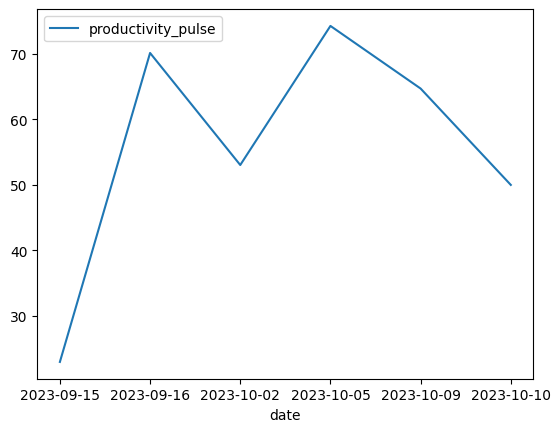

In [155]:
dailies_avg = df.groupby('date').mean(numeric_only=True)
dailies_avg.head()
dailies_avg.plot.line(y='productivity_pulse')
# figs, axs = subplots()
# df['productivity_pulse'].plot.line(ax=)

## Grouping by Date and Graphing Task Progression
Now we have to retrieve the 

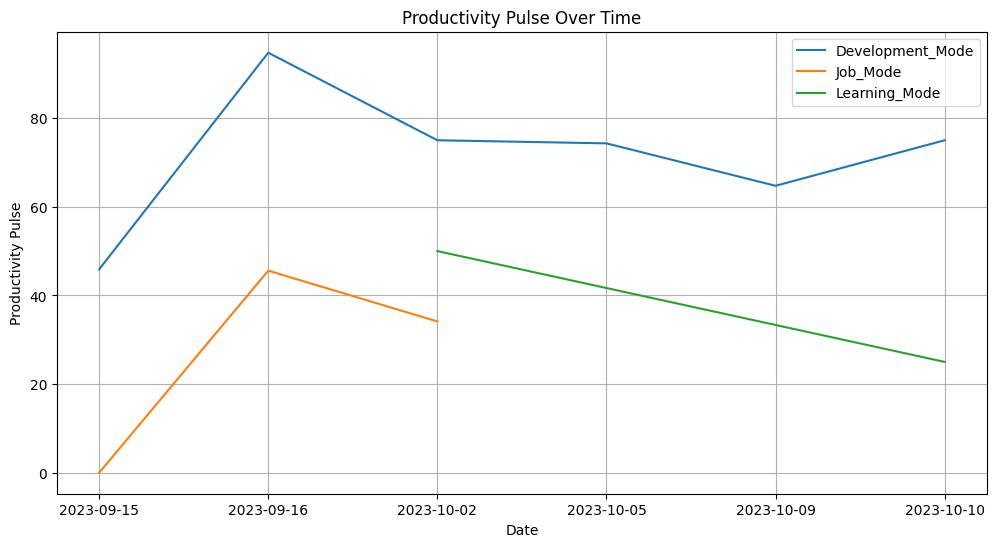

In [161]:
relevant_info = df[['date', 'productivity_pulse', 'task_mode']]
grouped_ri = relevant_info.groupby('task_mode')

plt.figure(figsize=(12, 6))

for name, group in grouped_ri:
    group = group.sort_values('date') #sorting data by date -> sequential
    date = group['date'] # x axis data
    productivity_pulse = group['productivity_pulse'] # y axis data
    task_mode = name[0]  # grouped by task so this is naturally the first value in the tuple
    plt.plot(date, productivity_pulse, label=name)

plt.xlabel('Date')
plt.ylabel('Productivity Pulse')
plt.title('Productivity Pulse Over Time')
plt.legend(loc='best')
plt.grid(True)

plt.show()